In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyreadstat as stat
import seaborn as sns
from pathlib import Path
import os

In [ ]:
att22 = pd.read_csv("/Users/adamcartwright/ncerdc/Student Data/Misc Student Data/attendance_pub2022.csv")

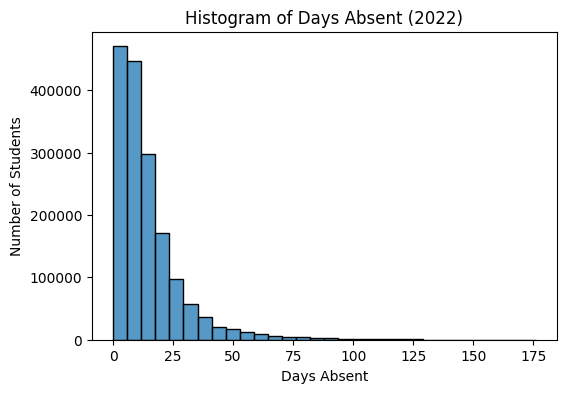

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(att22["daya"], bins=30)
plt.title("Histogram of Days Absent (2022)")
plt.xlabel("Days Absent")
plt.ylabel("Number of Students")
plt.show()

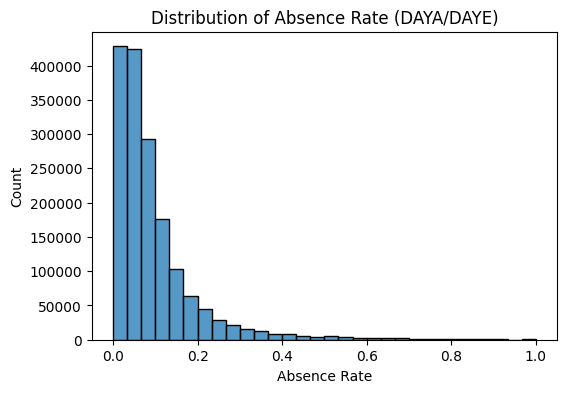

In [16]:
att22["abs_rate"] = att22["daya"] / att22["daye"]
plt.figure(figsize=(6,4))
sns.histplot(att22["abs_rate"], bins=30)
plt.title("Distribution of Absence Rate (DAYA/DAYE)")
plt.xlabel("Absence Rate")
plt.ylabel("Count")
plt.show()


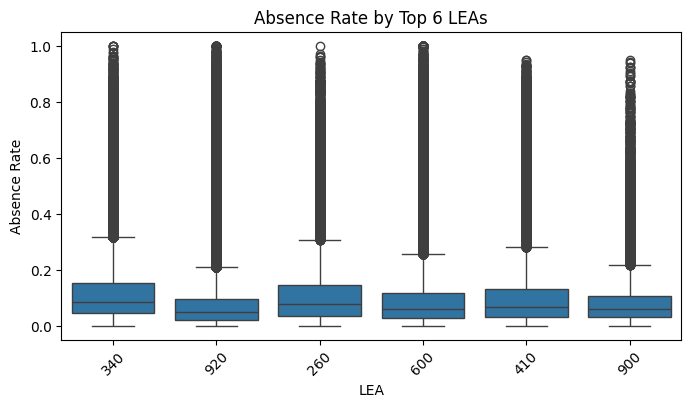

In [17]:
top_leas = att22["lea"].value_counts().nlargest(6).index.tolist()

plt.figure(figsize=(8,4))
sns.boxplot(
    data=att22[att22["lea"].isin(top_leas)],
    x="lea",
    y="abs_rate"
)
plt.xticks(rotation=45)
plt.title("Absence Rate by Top 6 LEAs")
plt.xlabel("LEA")
plt.ylabel("Absence Rate")
plt.show()



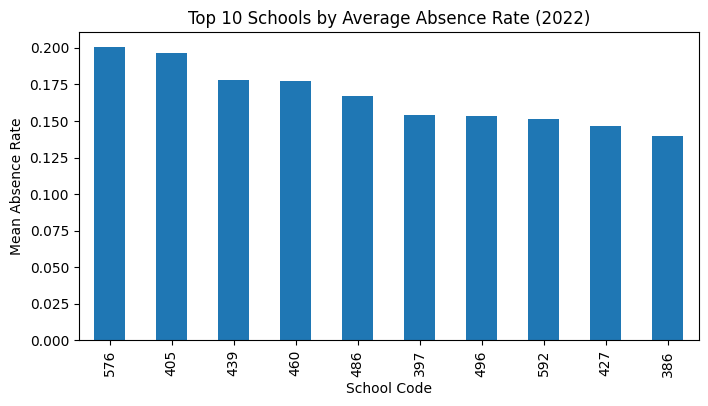

In [18]:
sch_avg = att22.groupby("schlcode")["abs_rate"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sch_avg.plot(kind="bar")
plt.title("Top 10 Schools by Average Absence Rate (2022)")
plt.ylabel("Mean Absence Rate")
plt.xlabel("School Code")
plt.show()


In [21]:
data_dir = Path("/Users/adamcartwright/ncerdc/Student Data/Misc Student Data")

att18 = pd.read_csv(data_dir / "attendance_pub2018.csv")
att19 = pd.read_csv(data_dir / "attendance_pub2019.csv")
att21 = pd.read_csv(data_dir / "attendance_pub2021.csv")
att22 = pd.read_csv(data_dir / "attendance_pub2022.csv")

for df, yr in [(att18,2018),(att19,2019),(att21,2021),(att22,2022)]:
    df["year"] = yr
    
all_att = pd.concat([att18, att19, att21, att22],
                    ignore_index=True)

all_att["abs_rate"] = all_att["daya"] / all_att["daye"]



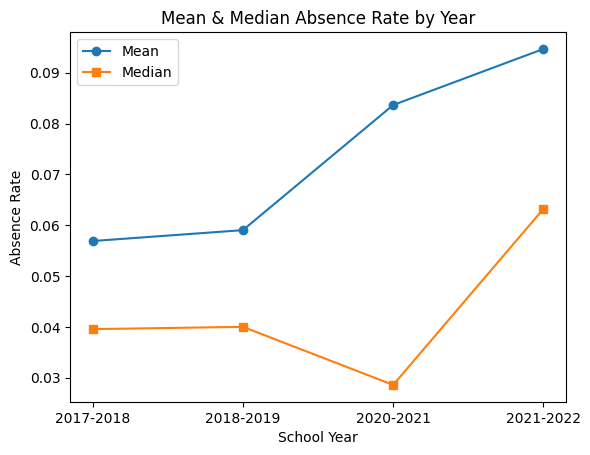

In [23]:
summary = (all_att
           .groupby("schl_yr")["abs_rate"]
           .agg(["mean","median"])
           .reset_index())

plt.plot(summary["schl_yr"], summary["mean"], marker="o", label="Mean")
plt.plot(summary["schl_yr"], summary["median"], marker="s", label="Median")
plt.xticks(summary["schl_yr"])
plt.xlabel("School Year")
plt.ylabel("Absence Rate")
plt.title("Mean & Median Absence Rate by Year")
plt.legend()
plt.show()

In [ ]:
# 1) Cast the “whole‐number” columns to int
#    (If you have any NaNs, you’ll need to decide how to handle them first—
#     e.g. drop or fill with a sentinel before casting.)
for col in ["dayp", "daya", "daye"]:
    # Round any stray floats, then cast
    all_att[col] = all_att[col].round(0).astype(int)

# 2) If MASTID came in as float IDs, cast it too
#    (Drop rows where MASTID is missing first, if any.)
all_att = all_att.dropna(subset=["mastid"])
all_att["mastid"] = all_att["mastid"].round(0).astype(int)

# 2) Re-order to the original schema
desired_order = ["schl_yr", "dayp", "daya", "daye", "lea", "schlcode", "mastid"]
all_att = all_att[desired_order]

all_att["schlcode"] = all_att["schlcode"].astype(str).str.zfill(3)

# 3) Sanity check
print(all_att.columns.tolist())  # should exactly match desired_order
print(all_att.head())

all_att.to_csv(data_dir/"attendance_clean.csv", index=False)


['schl_yr', 'dayp', 'daya', 'daye', 'lea', 'schlcode', 'mastid']
     schl_yr  dayp  daya  daye  lea schlcode   mastid
0  2017-2018    53    29    82  380      308  7507413
1  2017-2018   161    10   171  380      308  7507424
2  2017-2018    52    11    63  380      308  8946555
3  2017-2018   154    17   171  380      308  8946557
4  2017-2018    27     2    29  410      529  9613199
